In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..'); sys.path.append('../gp/')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
input_image = []
input_prob = []
input_gold = []
input_rhoana = []

# for z in range(0,50):
test_slices = range(15,25) + range(40,50) + range(65,75)
for z in test_slices:
    image, prob, gold, rhoana = gp.Util.read_cremi_section(os.path.expanduser('/home/d/data/CREMIGP/TEST/'), z)
    input_image.append(image[0:500,0:500])
    input_prob.append(255.-prob[0:500,0:500])
    input_gold.append(gold[0:500,0:500])
    input_rhoana.append(rhoana[0:500,0:500])    

In [3]:
with open('/home/d/FP/CREMITEST/bigM_fp_2D.p', 'rb') as f:
    bigM = pickle.load(f)

In [7]:
bigM_cA_after_95, out_cA_volume_after_auto_95, cA_auto_fixes_95, cA_auto_vi_s_95, visperstep = gp.Legacy.splits_global_from_M_automatic(None, 
                                                                                                                            bigM, 
                                                                                                                            input_image, 
                                                                                                                            input_prob, 
                                                                                                                            input_rhoana,
                                                                                                                            input_gold, 
                                                                                                                            sureness_threshold=.3,FP=True)


0.298039


In [18]:
OUTDIR = '/home/d/FP/CREMITEST'
split_vis = OUTDIR + '/cylinder_split_auto95_vis.p'

split_fixes = OUTDIR + '/cylinder_split_auto95_fixes.p'

output_95 = OUTDIR + '/cylinder_auto95_output.p'

with open(split_vis, 'wb') as f:
    pickle.dump(visperstep, f)

with open(split_fixes, 'wb') as f:
    pickle.dump(cA_auto_fixes_95, f)       

with open(output_95, 'wb') as f:
    pickle.dump(out_cA_volume_after_auto_95, f) 


In [19]:

split_vis = OUTDIR + '/cylinder_split_simuser_vis.p'

split_fixes = OUTDIR + '/cylinder_split_simuser_fixes.p'

output_95 = OUTDIR + '/cylinder_simuser_output.p'
bigM_cylinder_after_95, out_cylinder_volume_after_auto_95, cylinder_auto_fixes_95, cylinder_auto_vi_s_95, vi_s_per_step2 = gp.Legacy.splits_global_from_M(None, bigM, input_image, input_prob, input_rhoana, input_gold, hours=-1, FP=True)


0.290196 0.219608 0.290196
0.282353 0.278431 0.282353
0.235294 0.25098 0.25098
0.0 0.0 0.0
0.207843 0.223529 0.223529
0.329412 0.32549 0.329412
0.262745 0.0 0.262745
0.290196 0.270588 0.290196
0.219608 0.286274 0.286274
0.317647 0.235294 0.317647
0.266667 0.247059 0.266667
0.27451 0.270588 0.27451
0.0 0.0 0.0
0.2 0.25098 0.25098
0.196078 0.223529 0.223529
0.309804 0.262745 0.309804
0.258824 0.286274 0.286274
0.298039 0.0 0.298039
0.262745 0.0 0.262745
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.32549 0.0 0.32549
0.258824 0.235294 0.258824
0.262745 0.0 0.262745
0.168627 0.247059 0.247059
0.305882 0.305882 0.305882
0.266667 0.0 0.266667
0.0 0.0 0.0
0.0 0.0 0.0
0.32549 0.243137 0.32549
0.294118 0.223529 0.294118
0.239216 0.227451 0.239216
0.0 0.0 0.0
0.25098 0.0 0.25098
0.294118 0.262745 0.294118
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.27451 0.262745 0.27451
0.27451 0.298039 0.298039
0.192157 0.219608 0.219608
0.0 0.0 0.0
0.0 0.0 0.0
0.278431 0.270588 0.278431
0.145098 0.0 0.145098
0.0 0.0 0.0
0.

In [20]:

with open(split_vis, 'wb') as f:
    pickle.dump(vi_s_per_step2, f)

with open(split_fixes, 'wb') as f:
    pickle.dump(cylinder_auto_fixes_95, f)       

with open(output_95, 'wb') as f:
    pickle.dump(out_cylinder_volume_after_auto_95, f) 

In [14]:
len(visperstep)

201

In [38]:
bigM_cA_after_95, out_cA_volume_after_auto_95, cA_auto_fixes_95, cA_auto_vi_s_95, visperstep = gp.Legacy.splits_global_from_M_automatic(net, 
                                                                                                                            bigM_cremiA, 
                                                                                                                            input_image, 
                                                                                                                            input_prob, 
                                                                                                                            input_rhoana,
                                                                                                                            input_gold, 
                                                                                                                            sureness_threshold=.95)


here


In [135]:
gp.Legacy.VI(out_cA_volume_after_auto_95, input_gold)

(1.2772683303625527,
 1.4227682148970084,
 [0.9914972295290623,
  1.0065468511430007,
  0.9386433274922785,
  0.8513864951451726,
  0.9020146231854129,
  0.9028561846963399,
  0.9029402917052867,
  0.8343376887584597,
  0.8900334300076347,
  0.7640631368301207,
  1.5897406283580051,
  1.4259567455799158,
  1.4067934875872496,
  1.50799981769243,
  1.4216826061807275,
  1.5739188222653064,
  1.49120944768171,
  1.524625720524651,
  1.4673106923648627,
  1.4389061338649043,
  1.4238538236132894,
  1.2980002460822213,
  1.5434885895724069,
  1.5995917290199704,
  1.477708348120366,
  1.4370088289571,
  1.3529149509418676,
  1.3095287650616445,
  1.5158051045850938,
  1.527686164330098])

In [27]:
visperstep

[(1.1205187243522197,
  1.1205187243522197,
  [1.0903680301647931, 1.1506694185396462]),
 (1.1205750199211311,
  1.1205750199211311,
  [1.090480621302616, 1.1506694185396462]),
 (1.1205373537420451,
  1.1205373537420451,
  [1.090405288944444, 1.1506694185396462]),
 (1.1204855308356558,
  1.1204855308356558,
  [1.090405288944444, 1.1505657727268677]),
 (1.1204578291693812,
  1.1204578291693812,
  [1.090405288944444, 1.1505103693943184]),
 (1.1204093220969673,
  1.1204093220969673,
  [1.0903082747996162, 1.1505103693943184]),
 (1.1204352670924926,
  1.1204352670924926,
  [1.0903601647906669, 1.1505103693943184]),
 (1.120432408075092,
  1.120432408075092,
  [1.0903601647906669, 1.1505046513595172]),
 (1.1204205447144391,
  1.1204205447144391,
  [1.090336438069361, 1.1505046513595172]),
 (1.1203517795432445,
  1.1203517795432445,
  [1.0901989077269718, 1.1505046513595172]),
 (1.1203197728565311,
  1.1203197728565311,
  [1.090134894353545, 1.1505046513595172]),
 (1.1202874124069959,
  1.120

In [56]:
gp.metrics.adapted_rand(out_cA_volume_after_auto_95, input_gold)

0.51512425659267813

In [57]:
cA_auto_fixes_95

[(0, 0.99999964237213135),
 (1, 0.99993455410003662),
 (0, 0.99991738796234131),
 (0, 0.99988996982574463),
 (0, 0.99985110759735107),
 (0, 0.99977564811706543),
 (0, 0.9997628927230835),
 (1, 0.99975866079330444),
 (0, 0.99974793195724487),
 (0, 0.99972277879714966),
 (0, 0.99971282482147217),
 (0, 0.99967020750045776),
 (1, 0.99959456920623779),
 (1, 0.999583899974823),
 (0, 0.99957650899887085),
 (1, 0.99951696395874023),
 (1, 0.99937832355499268),
 (0, 0.99928903579711914),
 (1, 0.99907684326171875),
 (0, 0.99902892112731934),
 (0, 0.99892705678939819),
 (0, 0.99888914823532104),
 (1, 0.9998706579208374),
 (1, 0.99888545274734497),
 (1, 0.99886083602905273),
 (0, 0.99883228540420532),
 (0, 0.99930858612060547),
 (0, 0.99880576133728027),
 (0, 0.99867504835128784),
 (1, 0.99838781356811523),
 (0, 0.99836021661758423),
 (1, 0.998313307762146),
 (0, 0.99977326393127441),
 (1, 0.99948069096907322),
 (0, 0.99829679727554321),
 (0, 0.99823164939880371),
 (0, 0.99810117483139038),
 (0, 0.

In [64]:
import numpy as np

In [70]:
p = np.load('/tmp/trainB.npz.npy', mmap_mode='r')
t = np.load('/tmp/trainB_targets.npz.npy', mmap_mode='r')

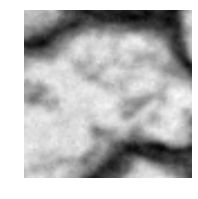

In [80]:
gp.Util.view(p[2][0], color=False)

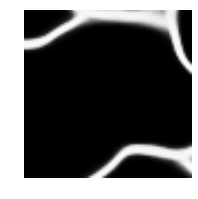

In [81]:
gp.Util.view(p[2][1], color=False)

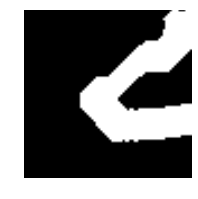

In [83]:
gp.Util.view(p[2][3], color=False)

In [79]:
t[2]

1.0